In [1]:
from patchedimage import PatchedImage

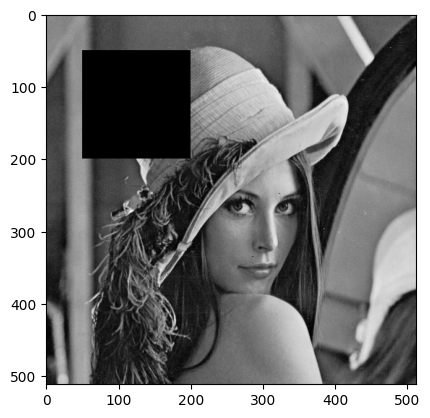

In [6]:
imgp = PatchedImage("images/lena.tif",4)
imgp.set_masque((50,50),(199,199))
imgp.set_priorities()
imgp.show_img()

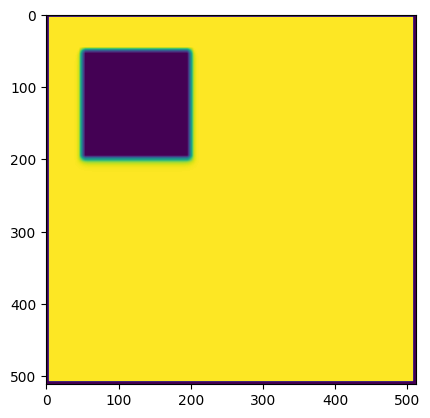

In [7]:
import matplotlib.pyplot as plt

plt.imshow(imgp.priority) # pourquoi pas la meme priorité sur les bors de l'image (haut/gauche et bas/droite)

#plt.imshow(imgp.priority[imgp.masque[0][0]:imgp.masque[1][0]+1,imgp.masque[0][1]:imgp.masque[1][1]+1])

In [8]:
imgp.find_max_priority()

array([199, 199])